<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/Text_Process_Feature_extraction_(Digital_Deepak_Tweets).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Deepak.txt to Deepak.txt


In [ ]:
#!python -m spacy download en_core_web_md

In [4]:
import pandas as pd
deepak=pd.read_csv("Deepak.txt",error_bad_lines=False)

b'Skipping line 17: expected 1 fields, saw 2\nSkipping line 19: expected 1 fields, saw 2\nSkipping line 30: expected 1 fields, saw 2\nSkipping line 31: expected 1 fields, saw 6\nSkipping line 36: expected 1 fields, saw 2\nSkipping line 42: expected 1 fields, saw 2\nSkipping line 53: expected 1 fields, saw 3\nSkipping line 59: expected 1 fields, saw 4\nSkipping line 76: expected 1 fields, saw 2\nSkipping line 95: expected 1 fields, saw 2\nSkipping line 97: expected 1 fields, saw 2\nSkipping line 99: expected 1 fields, saw 2\nSkipping line 107: expected 1 fields, saw 2\nSkipping line 111: expected 1 fields, saw 2\nSkipping line 113: expected 1 fields, saw 2\nSkipping line 116: expected 1 fields, saw 2\nSkipping line 121: expected 1 fields, saw 2\nSkipping line 123: expected 1 fields, saw 2\nSkipping line 132: expected 1 fields, saw 3\nSkipping line 135: expected 1 fields, saw 2\nSkipping line 137: expected 1 fields, saw 2\nSkipping line 141: expected 1 fields, saw 2\nSkipping line 142: e

In [5]:
deepak=deepak.dropna()
deepak

,Text
0,@shruti_mishra13 Mail krishna@pixeltrack.com
1,"@kingsidharth MBP 15"" was a mess with the heat..."
2,@kingsidharth I love my AirPods Pro. It's work...
3,Work culture is not about coffee machines and ...
4,The best interface for office productivity is ...
...,...
2509,How to Use Data from Heat-Maps to Improve User...
2510,@kaul_vivek It is a platform to sell your advi...
2511,@kaul_vivek What is your take on Gold Price? I...
2512,@kaul_vivek Thanks for responding. I am going ...


In [6]:
deepak = [Text.strip() for Text in deepak.Text] # remove both the leading and the trailing characters
deepak = [Text for Text in deepak if Text] # removes empty strings, because they are considered in Python as False
deepak[0:10]

['@shruti_mishra13 Mail krishna@pixeltrack.com',
 '@kingsidharth MBP 15" was a mess with the heating and the keyboard but the MBP 16" is quite a breeze. Waiting for MBP 16" with M1 Processor which I believe would even be better.',
 "@kingsidharth I love my AirPods Pro. It's working well for me.",
 'Work culture is not about coffee machines and foosball tables.',
 'The best interface for office productivity is face-to-face meetings. I hope we get back to working in a real office soon! \r\n\r\nPeople who say that WFH is more productive and better are the ones in toxic work environments with bad teams.',
 "A startup is more like Jazz and less like Orchestra. It's emergent and not always about executing a planned strategy.",
 'I would choose No.2 because the right team can fix the wrong idea but the right idea cannot fix the wrong team.',
 '1. Right Idea + Wrong Team\r\n2. Wrong Idea + Right Team\r\n\r\nWhat would you choose if you have to choose between these two?',
 'Interview every pers

In [7]:
# Joining the list into one string/text
text = ' '.join(deepak)
text

'@shruti_mishra13 Mail krishna@pixeltrack.com @kingsidharth MBP 15" was a mess with the heating and the keyboard but the MBP 16" is quite a breeze. Waiting for MBP 16" with M1 Processor which I believe would even be better. @kingsidharth I love my AirPods Pro. It\'s working well for me. Work culture is not about coffee machines and foosball tables. The best interface for office productivity is face-to-face meetings. I hope we get back to working in a real office soon! \r\n\r\nPeople who say that WFH is more productive and better are the ones in toxic work environments with bad teams. A startup is more like Jazz and less like Orchestra. It\'s emergent and not always about executing a planned strategy. I would choose No.2 because the right team can fix the wrong idea but the right idea cannot fix the wrong team. 1. Right Idea + Wrong Team\r\n2. Wrong Idea + Right Team\r\n\r\nWhat would you choose if you have to choose between these two? Interview every person you hire. Even if you are at

In [8]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'shrutimishra13 Mail krishnapixeltrackcom kingsidharth MBP 15 was a mess with the heating and the keyboard but the MBP 16 is quite a breeze Waiting for MBP 16 with M1 Processor which I believe would even be better kingsidharth I love my AirPods Pro Its working well for me Work culture is not about coffee machines and foosball tables The best interface for office productivity is facetoface meetings I hope we get back to working in a real office soon \r\n\r\nPeople who say that WFH is more productive and better are the ones in toxic work environments with bad teams A startup is more like Jazz and less like Orchestra Its emergent and not always about executing a planned strategy I would choose No2 because the right team can fix the wrong idea but the right idea cannot fix the wrong team 1 Right Idea  Wrong Team\r\n2 Wrong Idea  Right Team\r\n\r\nWhat would you choose if you have to choose between these two Interview every person you hire Even if you are at 1000s of employees gunjanla Got 

In [11]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['shrutimishra13', 'Mail', 'krishnapixeltrackcom', 'kingsidharth', 'MBP', '15', 'was', 'a', 'mess', 'with', 'the', 'heating', 'and', 'the', 'keyboard', 'but', 'the', 'MBP', '16', 'is', 'quite', 'a', 'breeze', 'Waiting', 'for', 'MBP', '16', 'with', 'M1', 'Processor', 'which', 'I', 'believe', 'would', 'even', 'be', 'better', 'kingsidharth', 'I', 'love', 'my', 'AirPods', 'Pro', 'Its', 'working', 'well', 'for', 'me', 'Work', 'culture']


In [ ]:
#import nltk
#nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
len(text_tokens)

43176

In [13]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['shrutimishra13', 'Mail', 'krishnapixeltrackcom', 'kingsidharth', 'MBP', '15', 'mess', 'heating', 'keyboard', 'MBP', '16', 'quite', 'breeze', 'Waiting', 'MBP', '16', 'M1', 'Processor', 'I', 'believe', 'would', 'even', 'better', 'kingsidharth', 'I', 'love', 'AirPods', 'Pro', 'Its', 'working', 'well', 'Work', 'culture', 'coffee', 'machines', 'foosball', 'tables', 'The', 'best', 'interface']


In [14]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['shrutimishra13', 'mail', 'krishnapixeltrackcom', 'kingsidharth', 'mbp', '15', 'mess', 'heating', 'keyboard', 'mbp', '16', 'quite', 'breeze', 'waiting', 'mbp', '16', 'm1', 'processor', 'i', 'believe', 'would', 'even', 'better', 'kingsidharth', 'i']


In [15]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['shrutimishra13', 'mail', 'krishnapixeltrackcom', 'kingsidharth', 'mbp', '15', 'mess', 'heat', 'keyboard', 'mbp', '16', 'quit', 'breez', 'wait', 'mbp', '16', 'm1', 'processor', 'i', 'believ', 'would', 'even', 'better', 'kingsidharth', 'i', 'love', 'airpod', 'pro', 'it', 'work', 'well', 'work', 'cultur', 'coffe', 'machin', 'foosbal', 'tabl', 'the', 'best', 'interfac']


In [ ]:
#!python -m spacy download en

In [16]:
# NLP english language model of spacy library
nlp = spacy.load('en') 

In [17]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

shrutimishra13 Mail krishnapixeltrackcom kingsidharth MBP 15 mess heating keyboard MBP 16 quite breeze Waiting MBP 16 M1 Processor I believe would even better kingsidharth I love AirPods Pro Its working well Work culture coffee machines foosball tables The best interface


In [18]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['shrutimishra13', 'Mail', 'krishnapixeltrackcom', 'kingsidharth', 'MBP', '15', 'mess', 'heating', 'keyboard', 'MBP', '16', 'quite', 'breeze', 'Waiting', 'MBP', '16', 'M1', 'Processor', '-PRON-', 'believe', 'would', 'even', 'better', 'kingsidharth', '-PRON-']


#### Feature Extraction

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [20]:
print(vectorizer.vocabulary_)

{'shrutimishra13': 5184, 'mail': 3745, 'krishnapixeltrackcom': 3543, 'kingsidharth': 3527, 'mbp': 3845, '15': 51, 'mess': 3889, 'heating': 2220, 'keyboard': 3507, '16': 56, 'quite': 4632, 'breeze': 814, 'waiting': 6006, 'm1': 3723, 'processor': 4534, 'pron': 4572, 'believe': 669, 'would': 6132, 'even': 1731, 'better': 684, 'love': 3706, 'airpods': 313, 'pro': 4528, 'working': 6123, 'well': 6056, 'work': 6117, 'culture': 1267, 'coffee': 1059, 'machine': 3725, 'foosball': 1921, 'table': 5517, 'the': 5595, 'good': 2078, 'interface': 3334, 'office': 4175, 'productivity': 4544, 'facetoface': 1813, 'meeting': 3863, 'hope': 2285, 'get': 2033, 'back': 591, 'real': 4697, 'soon': 5282, 'people': 4343, 'say': 4995, 'wfh': 6061, 'productive': 4543, 'one': 4197, 'toxic': 5713, 'environment': 1698, 'bad': 597, 'team': 5553, 'startup': 5360, 'like': 3657, 'jazz': 3420, 'less': 3633, 'orchestra': 4224, 'emergent': 1639, 'always': 360, 'execute': 1762, 'plan': 4401, 'strategy': 5398, 'choose': 1002, 'n

In [21]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['14', '15', '1500', '15minute', '15th', '15x', '16', '17', '1707', '18', '189b', '19', '1918', '1960', '1984ishere', '199', '1995', '1997', '1crore', '1min', '1rproduct', '1st', '1to1', '20', '200', '2000', '2003', '2008', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '20162017', '2017', '2018', '2019', '2020', '2025', '2030', '20k', '20yearold', '21', '22', '223', '22by4', '22nd', '23']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
print(X.toarray().shape)

(28606, 6211)


#### Let's see how can bigrams and trigrams can be included here

In [23]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(deepak)

In [24]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'all', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'because', 'best', 'business', 'but', 'by', 'can', 'check', 'co', 'content', 'digital', 'digital marketing', 'digitaldpak', 'do', 'don', 'email', 'for', 'for the', 'from', 'get', 'good', 'great', 'has', 'have', 'how', 'how to', 'https', 'https co', 'if', 'if you', 'in', 'in the', 'india', 'is', 'is the', 'it', 'just', 'like', 'make', 'marketing', 'me', 'money', 'more', 'my', 'need', 'never', 'new', 'no', 'not', 'now', 'of', 'of the', 'on', 'one', 'only', 'out', 'people', 'please', 'razorpay', 'rt', 'so', 'than', 'thank', 'thank you', 'thanks', 'that', 'the', 'the best', 'there', 'they', 'this', 'time', 'to', 'to be', 'up', 'via', 'via digitaldpak', 'want', 'way', 'we', 'what', 'when', 'who', 'why', 'will', 'with', 'work', 'would', 'you', 'you are', 'you can', 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


#### TFidf vectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(deepak)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '10 digital', '10 digital marketing', '100', '8kvcb95uuy', 'about', 'about the', 'account', 'ad', 'ads', 'again', 'all', 'all the', 'also', 'always', 'am', 'amazing', 'amp', 'an', 'and', 'and it', 'and the', 'and then', 'and you', 'any', 'app', 'are', 'are not', 'are the', 'around', 'as', 'at', 'at deepak', 'at deepak pixeltrack', 'at the', 'attention', 'audience', 'automation', 'away', 'awesome', 'back', 'bad', 'bangalore', 'be', 'because', 'become', 'been', 'before', 'being', 'best', 'best way', 'best way to', 'better', 'big', 'blog', 'blogging', 'book', 'brand', 'build', 'building', 'business', 'but', 'buy', 'by', 'call', 'can', 'can be', 'can you', 'cannot', 'card', 'change', 'check', 'check out', 'check out this', 'co', 'co 8kvcb95uuy', 'com', 'come', 'coming', 'company', 'content', 'convertkit', 'cost', 'could', 'course', 'create', 'credit', 'customer', 'customers', 'data', 'day', 'deep', 'deepak', 'deepak pixeltrack', 'did', 'didn', 'digital', 'digital deepak', 'digital m

####  Generate wordcloud

In [26]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

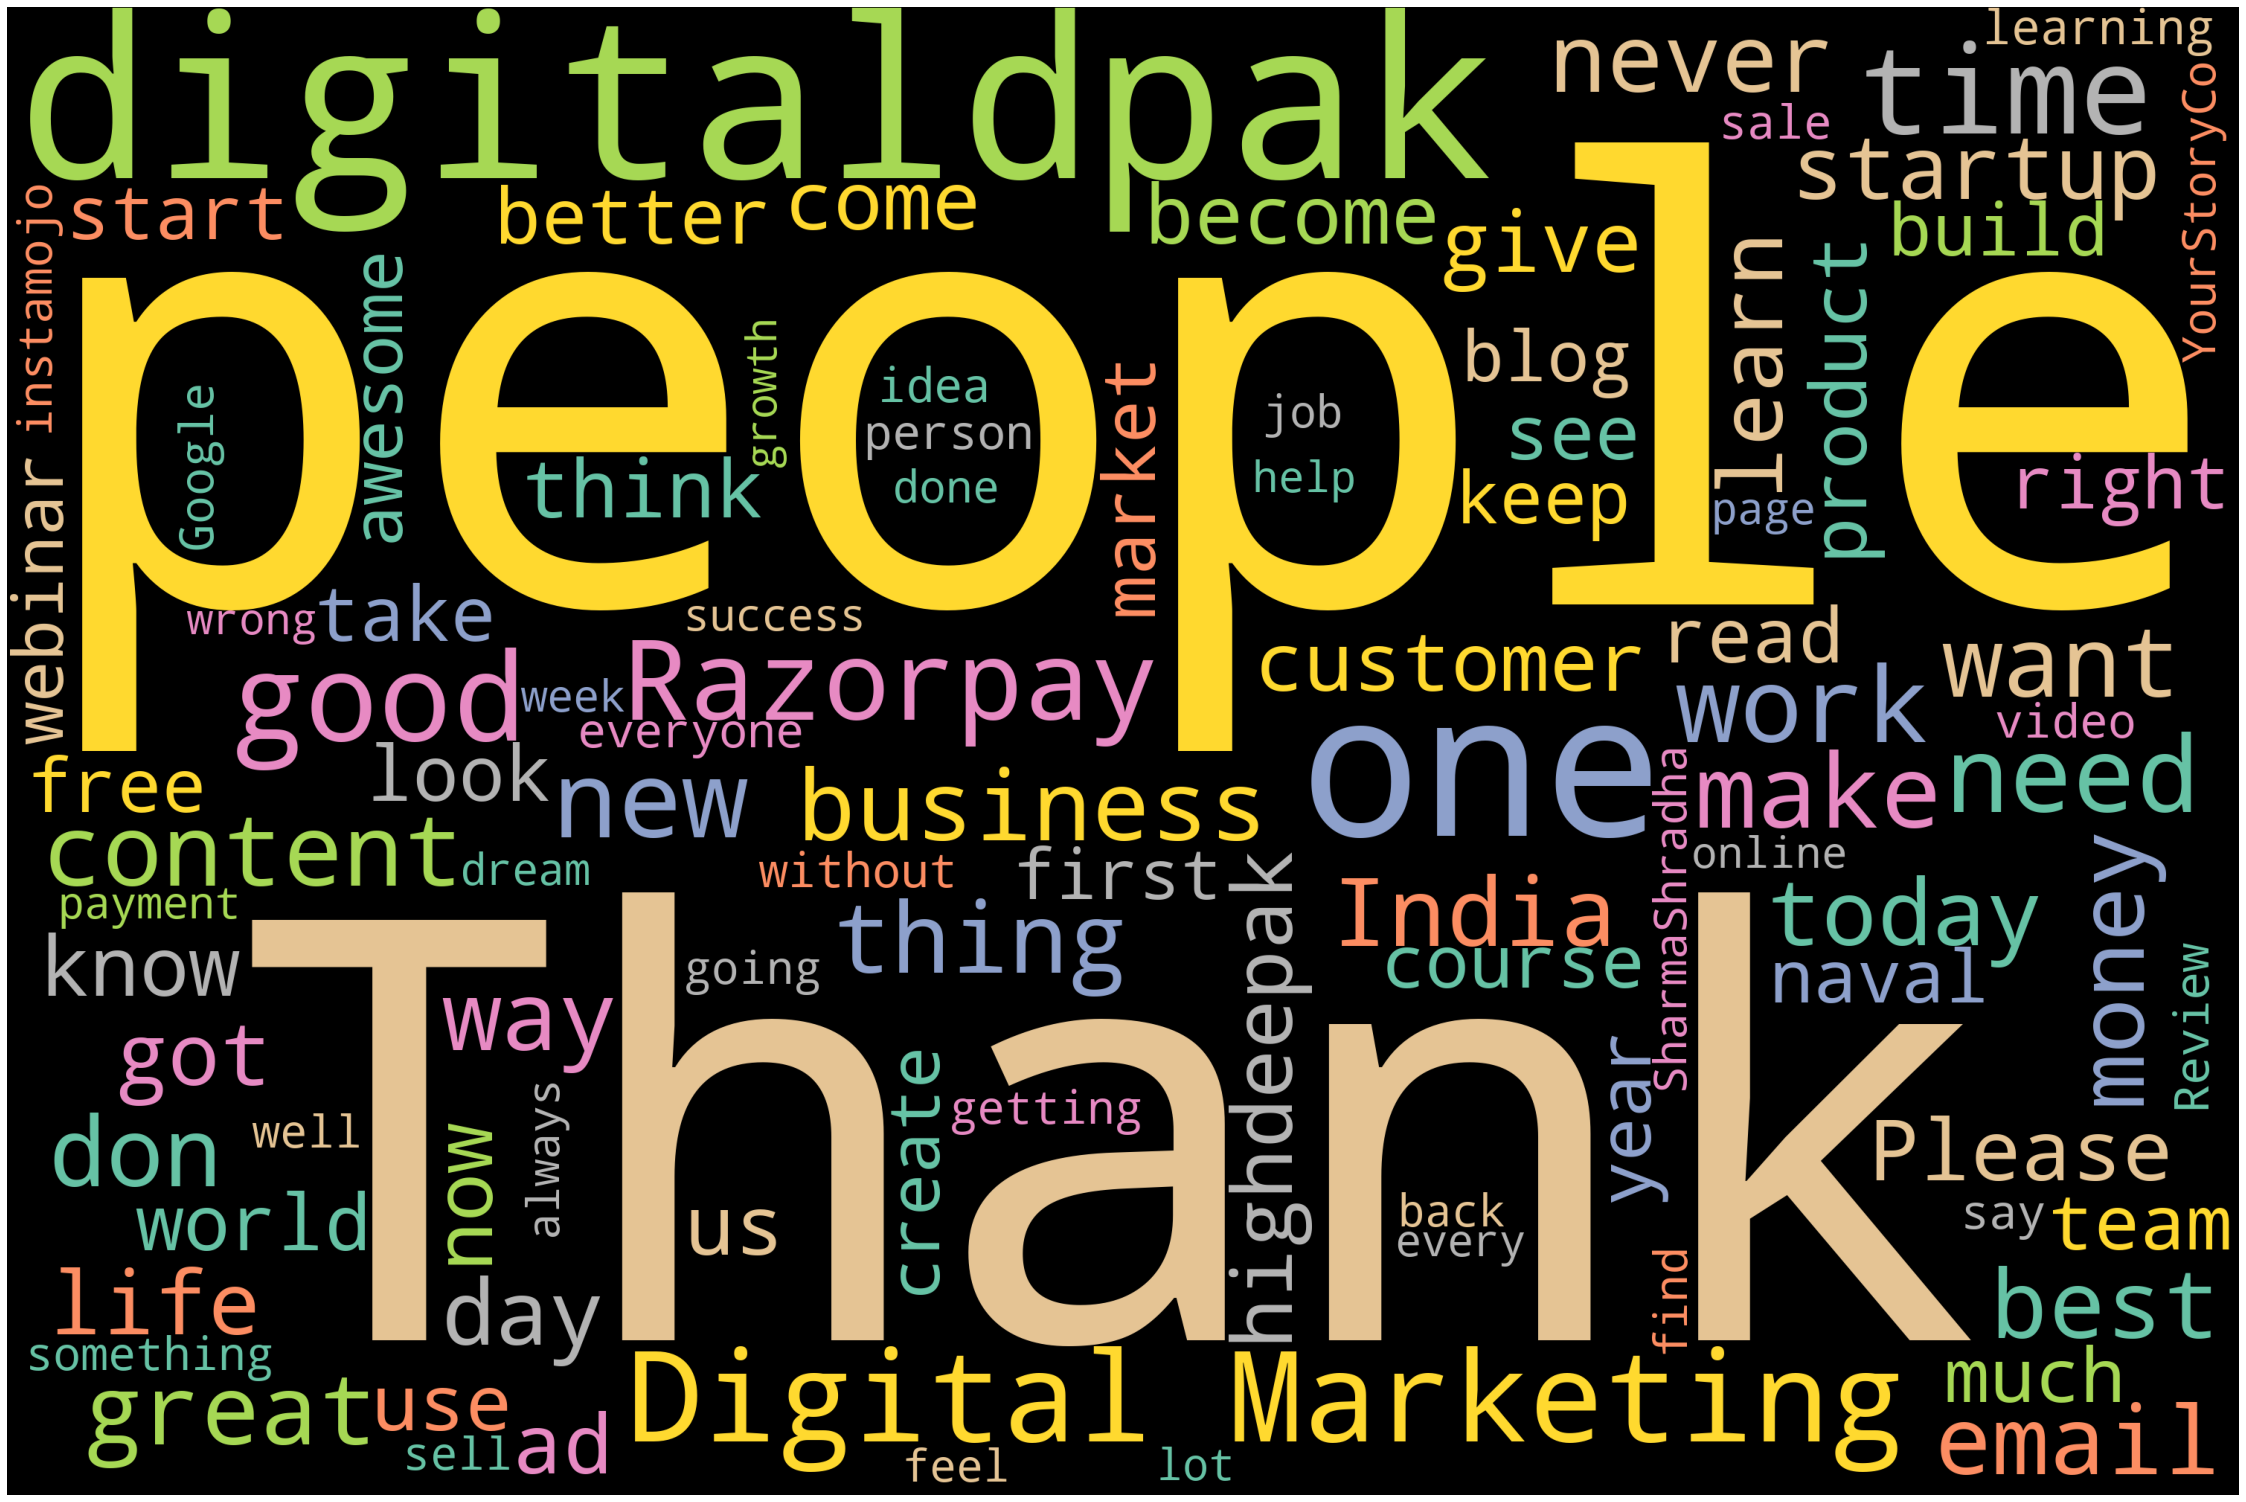

In [29]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('https')
stopwords.add('amp')
stopwords.add('co')
stopwords.add('kunalb11')
stopwords.add('go')
stopwords.add('via')
stopwords.add('RT')

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [30]:
# Save image
wordcloud.to_file("wordcloud.png")